In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/read.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'ultimate'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 0
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '1h',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['BTC-PERP', 'ETH-PERP', 'SOL-PERP'],
        'open': {
            '1h': {
                'supertrend': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                },
                'donchian': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 30,
                    'revert': False
                },
                'hull': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 180,
                    'revert': False
                }
            },
            '4h': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                },
                'donchian': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 30,
                    'revert': False
                },
                'hull': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 180,
                    'revert': False
                }    
            }    
            
        },
        'close': {
            '1h': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 0,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                } 
            }
        }
    },
    'lead': {
        'symbol': [],
        'open': {
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 50,
        'price_percent': 5,
        'signal': None,
    },
    'sl': {
        'stop_percent': 50,
        'price_percent': None,
        'signal': {
            'timeframe': '1h',
            'signal': {
                'supertrend': {
                    'look_back': 0,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                }
            }
        }
    },
    'action_percent': 10,
    'leverage': 10,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/2 symbol 1/3 date 1/217
base: timeframe 1/2 symbol 1/3 date 2/217
base: timeframe 1/2 symbol 1/3 date 3/217
base: timeframe 1/2 symbol 1/3 date 4/217
base: timeframe 1/2 symbol 1/3 date 5/217
base: timeframe 1/2 symbol 1/3 date 6/217
base: timeframe 1/2 symbol 1/3 date 7/217
base: timeframe 1/2 symbol 1/3 date 8/217
base: timeframe 1/2 symbol 1/3 date 9/217
base: timeframe 1/2 symbol 1/3 date 10/217
base: timeframe 1/2 symbol 1/3 date 11/217
base: timeframe 1/2 symbol 1/3 date 12/217
base: timeframe 1/2 symbol 1/3 date 13/217
base: timeframe 1/2 symbol 1/3 date 14/217
base: timeframe 1/2 symbol 1/3 date 15/217
base: timeframe 1/2 symbol 1/3 date 16/217
base: timeframe 1/2 symbol 1/3 date 17/217
base: timeframe 1/2 symbol 1/3 date 18/217
base: timeframe 1/2 symbol 1/3 date 19/217
base: timeframe 1/2 symbol 1/3 date 20/217
base: timeframe 1/2 symbol 1/3 date 21/217
base: timeframe 1/2 symbol 1/3 date 22/217
base: timeframe 1/2 symbol 1/3 date 23/217
base: timeframe 1/2 

base: timeframe 1/2 symbol 1/3 date 190/217
base: timeframe 1/2 symbol 1/3 date 191/217
base: timeframe 1/2 symbol 1/3 date 192/217
base: timeframe 1/2 symbol 1/3 date 193/217
base: timeframe 1/2 symbol 1/3 date 194/217
base: timeframe 1/2 symbol 1/3 date 195/217
base: timeframe 1/2 symbol 1/3 date 196/217
base: timeframe 1/2 symbol 1/3 date 197/217
base: timeframe 1/2 symbol 1/3 date 198/217
base: timeframe 1/2 symbol 1/3 date 199/217
base: timeframe 1/2 symbol 1/3 date 200/217
base: timeframe 1/2 symbol 1/3 date 201/217
base: timeframe 1/2 symbol 1/3 date 202/217
base: timeframe 1/2 symbol 1/3 date 203/217
base: timeframe 1/2 symbol 1/3 date 204/217
base: timeframe 1/2 symbol 1/3 date 205/217
base: timeframe 1/2 symbol 1/3 date 206/217
base: timeframe 1/2 symbol 1/3 date 207/217
base: timeframe 1/2 symbol 1/3 date 208/217
base: timeframe 1/2 symbol 1/3 date 209/217
base: timeframe 1/2 symbol 1/3 date 210/217
base: timeframe 1/2 symbol 1/3 date 211/217
base: timeframe 1/2 symbol 1/3 d

base: timeframe 1/2 symbol 2/3 date 163/217
base: timeframe 1/2 symbol 2/3 date 164/217
base: timeframe 1/2 symbol 2/3 date 165/217
base: timeframe 1/2 symbol 2/3 date 166/217
base: timeframe 1/2 symbol 2/3 date 167/217
base: timeframe 1/2 symbol 2/3 date 168/217
base: timeframe 1/2 symbol 2/3 date 169/217
base: timeframe 1/2 symbol 2/3 date 170/217
base: timeframe 1/2 symbol 2/3 date 171/217
base: timeframe 1/2 symbol 2/3 date 172/217
base: timeframe 1/2 symbol 2/3 date 173/217
base: timeframe 1/2 symbol 2/3 date 174/217
base: timeframe 1/2 symbol 2/3 date 175/217
base: timeframe 1/2 symbol 2/3 date 176/217
base: timeframe 1/2 symbol 2/3 date 177/217
base: timeframe 1/2 symbol 2/3 date 178/217
base: timeframe 1/2 symbol 2/3 date 179/217
base: timeframe 1/2 symbol 2/3 date 180/217
base: timeframe 1/2 symbol 2/3 date 181/217
base: timeframe 1/2 symbol 2/3 date 182/217
base: timeframe 1/2 symbol 2/3 date 183/217
base: timeframe 1/2 symbol 2/3 date 184/217
base: timeframe 1/2 symbol 2/3 d

base: timeframe 1/2 symbol 3/3 date 135/217
base: timeframe 1/2 symbol 3/3 date 136/217
base: timeframe 1/2 symbol 3/3 date 137/217
base: timeframe 1/2 symbol 3/3 date 138/217
base: timeframe 1/2 symbol 3/3 date 139/217
base: timeframe 1/2 symbol 3/3 date 140/217
base: timeframe 1/2 symbol 3/3 date 141/217
base: timeframe 1/2 symbol 3/3 date 142/217
base: timeframe 1/2 symbol 3/3 date 143/217
base: timeframe 1/2 symbol 3/3 date 144/217
base: timeframe 1/2 symbol 3/3 date 145/217
base: timeframe 1/2 symbol 3/3 date 146/217
base: timeframe 1/2 symbol 3/3 date 147/217
base: timeframe 1/2 symbol 3/3 date 148/217
base: timeframe 1/2 symbol 3/3 date 149/217
base: timeframe 1/2 symbol 3/3 date 150/217
base: timeframe 1/2 symbol 3/3 date 151/217
base: timeframe 1/2 symbol 3/3 date 152/217
base: timeframe 1/2 symbol 3/3 date 153/217
base: timeframe 1/2 symbol 3/3 date 154/217
base: timeframe 1/2 symbol 3/3 date 155/217
base: timeframe 1/2 symbol 3/3 date 156/217
base: timeframe 1/2 symbol 3/3 d

base: timeframe 2/2 symbol 1/3 date 108/342
base: timeframe 2/2 symbol 1/3 date 109/342
base: timeframe 2/2 symbol 1/3 date 110/342
base: timeframe 2/2 symbol 1/3 date 111/342
base: timeframe 2/2 symbol 1/3 date 112/342
base: timeframe 2/2 symbol 1/3 date 113/342
base: timeframe 2/2 symbol 1/3 date 114/342
base: timeframe 2/2 symbol 1/3 date 115/342
base: timeframe 2/2 symbol 1/3 date 116/342
base: timeframe 2/2 symbol 1/3 date 117/342
base: timeframe 2/2 symbol 1/3 date 118/342
base: timeframe 2/2 symbol 1/3 date 119/342
base: timeframe 2/2 symbol 1/3 date 120/342
base: timeframe 2/2 symbol 1/3 date 121/342
base: timeframe 2/2 symbol 1/3 date 122/342
base: timeframe 2/2 symbol 1/3 date 123/342
base: timeframe 2/2 symbol 1/3 date 124/342
base: timeframe 2/2 symbol 1/3 date 125/342
base: timeframe 2/2 symbol 1/3 date 126/342
base: timeframe 2/2 symbol 1/3 date 127/342
base: timeframe 2/2 symbol 1/3 date 128/342
base: timeframe 2/2 symbol 1/3 date 129/342
base: timeframe 2/2 symbol 1/3 d

base: timeframe 2/2 symbol 1/3 date 295/342
base: timeframe 2/2 symbol 1/3 date 296/342
base: timeframe 2/2 symbol 1/3 date 297/342
base: timeframe 2/2 symbol 1/3 date 298/342
base: timeframe 2/2 symbol 1/3 date 299/342
base: timeframe 2/2 symbol 1/3 date 300/342
base: timeframe 2/2 symbol 1/3 date 301/342
base: timeframe 2/2 symbol 1/3 date 302/342
base: timeframe 2/2 symbol 1/3 date 303/342
base: timeframe 2/2 symbol 1/3 date 304/342
base: timeframe 2/2 symbol 1/3 date 305/342
base: timeframe 2/2 symbol 1/3 date 306/342
base: timeframe 2/2 symbol 1/3 date 307/342
base: timeframe 2/2 symbol 1/3 date 308/342
base: timeframe 2/2 symbol 1/3 date 309/342
base: timeframe 2/2 symbol 1/3 date 310/342
base: timeframe 2/2 symbol 1/3 date 311/342
base: timeframe 2/2 symbol 1/3 date 312/342
base: timeframe 2/2 symbol 1/3 date 313/342
base: timeframe 2/2 symbol 1/3 date 314/342
base: timeframe 2/2 symbol 1/3 date 315/342
base: timeframe 2/2 symbol 1/3 date 316/342
base: timeframe 2/2 symbol 1/3 d

base: timeframe 2/2 symbol 2/3 date 143/342
base: timeframe 2/2 symbol 2/3 date 144/342
base: timeframe 2/2 symbol 2/3 date 145/342
base: timeframe 2/2 symbol 2/3 date 146/342
base: timeframe 2/2 symbol 2/3 date 147/342
base: timeframe 2/2 symbol 2/3 date 148/342
base: timeframe 2/2 symbol 2/3 date 149/342
base: timeframe 2/2 symbol 2/3 date 150/342
base: timeframe 2/2 symbol 2/3 date 151/342
base: timeframe 2/2 symbol 2/3 date 152/342
base: timeframe 2/2 symbol 2/3 date 153/342
base: timeframe 2/2 symbol 2/3 date 154/342
base: timeframe 2/2 symbol 2/3 date 155/342
base: timeframe 2/2 symbol 2/3 date 156/342
base: timeframe 2/2 symbol 2/3 date 157/342
base: timeframe 2/2 symbol 2/3 date 158/342
base: timeframe 2/2 symbol 2/3 date 159/342
base: timeframe 2/2 symbol 2/3 date 160/342
base: timeframe 2/2 symbol 2/3 date 161/342
base: timeframe 2/2 symbol 2/3 date 162/342
base: timeframe 2/2 symbol 2/3 date 163/342
base: timeframe 2/2 symbol 2/3 date 164/342
base: timeframe 2/2 symbol 2/3 d

base: timeframe 2/2 symbol 2/3 date 331/342
base: timeframe 2/2 symbol 2/3 date 332/342
base: timeframe 2/2 symbol 2/3 date 333/342
base: timeframe 2/2 symbol 2/3 date 334/342
base: timeframe 2/2 symbol 2/3 date 335/342
base: timeframe 2/2 symbol 2/3 date 336/342
base: timeframe 2/2 symbol 2/3 date 337/342
base: timeframe 2/2 symbol 2/3 date 338/342
base: timeframe 2/2 symbol 2/3 date 339/342
base: timeframe 2/2 symbol 2/3 date 340/342
base: timeframe 2/2 symbol 2/3 date 341/342
base: timeframe 2/2 symbol 2/3 date 342/342
base: timeframe 2/2 symbol 3/3 date 1/342
base: timeframe 2/2 symbol 3/3 date 2/342
base: timeframe 2/2 symbol 3/3 date 3/342
base: timeframe 2/2 symbol 3/3 date 4/342
base: timeframe 2/2 symbol 3/3 date 5/342
base: timeframe 2/2 symbol 3/3 date 6/342
base: timeframe 2/2 symbol 3/3 date 7/342
base: timeframe 2/2 symbol 3/3 date 8/342
base: timeframe 2/2 symbol 3/3 date 9/342
base: timeframe 2/2 symbol 3/3 date 10/342
base: timeframe 2/2 symbol 3/3 date 11/342
base: ti

base: timeframe 2/2 symbol 3/3 date 178/342
base: timeframe 2/2 symbol 3/3 date 179/342
base: timeframe 2/2 symbol 3/3 date 180/342
base: timeframe 2/2 symbol 3/3 date 181/342
base: timeframe 2/2 symbol 3/3 date 182/342
base: timeframe 2/2 symbol 3/3 date 183/342
base: timeframe 2/2 symbol 3/3 date 184/342
base: timeframe 2/2 symbol 3/3 date 185/342
base: timeframe 2/2 symbol 3/3 date 186/342
base: timeframe 2/2 symbol 3/3 date 187/342
base: timeframe 2/2 symbol 3/3 date 188/342
base: timeframe 2/2 symbol 3/3 date 189/342
base: timeframe 2/2 symbol 3/3 date 190/342
base: timeframe 2/2 symbol 3/3 date 191/342
base: timeframe 2/2 symbol 3/3 date 192/342
base: timeframe 2/2 symbol 3/3 date 193/342
base: timeframe 2/2 symbol 3/3 date 194/342
base: timeframe 2/2 symbol 3/3 date 195/342
base: timeframe 2/2 symbol 3/3 date 196/342
base: timeframe 2/2 symbol 3/3 date 197/342
base: timeframe 2/2 symbol 3/3 date 198/342
base: timeframe 2/2 symbol 3/3 date 199/342
base: timeframe 2/2 symbol 3/3 d

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add supertrend to BTC-PERP 1h
base add donchian to BTC-PERP 1h
base add hull to BTC-PERP 1h
base add supertrend to ETH-PERP 1h
base add donchian to ETH-PERP 1h
base add hull to ETH-PERP 1h
base add supertrend to SOL-PERP 1h
base add donchian to SOL-PERP 1h
base add hull to SOL-PERP 1h
base add supertrend to BTC-PERP 4h
base add donchian to BTC-PERP 4h
base add hull to BTC-PERP 4h
base add supertrend to ETH-PERP 4h
base add donchian to ETH-PERP 4h
base add hull to ETH-PERP 4h
base add supertrend to SOL-PERP 4h
base add donchian to SOL-PERP 4h
base add hull to SOL-PERP 4h


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 01:00:00: progress 1/4200
  BTC-PERP
     Not available data
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
Time 2022-01-01 02:00:00: progress 2/4200
  BTC-PERP
     Not available data
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
Time 2022-01-01 03:00:00: progress 3/4200
  BTC-PERP
     Not available data
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
Time 2022-01-01 04:00:00: progress 4/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP

  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_s

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-03 23:00:00: progress 71/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SO

     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-05 03:00:00: progress 99/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signa

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-06 13:00:00: progress 133/4200
  ETH-PERP
       side: sell
       price: 3439.1
       sl: 3645.915250884275
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 

       side: sell
       price: 3089.1
       sl: 3395.3338683218144
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-08 01:00:00: progress 169/4200
  ETH-PERP
       side: sell
       price: 3172.8
       sl: 3395

     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-09 09:00:00: progress 201/4200
  ETH-PERP
       side: sell
       price: 3092.0
       sl: 3275.988404147985
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-10 19:00:00: progress 235/4200
  ETH-PERP
       side: sell
       price: 3093.5
       sl: 3275.988404147985
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-12 04:00:00: progress 268/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SO

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-13 08:00:00: progress 296/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-P

     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-14 11:00:00: progress 323/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_s

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-15 20:00:00: progress 356/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH

     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-17 04:00:00: progress 388/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_sid

     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-18 11:00:00: progress 419/4200
 

     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-19 15:00:00: progress 447/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_si

     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-20 21:00:00: progress 477/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signa

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-22 01:00:00: progress 505/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_ch

     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-23 04:00:00: progress 532/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_ch

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-24 10:00:00: progress 562/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-25 15:00:00: progress 591/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell

     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-26 18:00:00: progress 618/4200
  BT

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-27 20:00:00: progress 644/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_chan

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-28 17:00:00: progress 665/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-29 17:00:00: progress 689/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PE

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-31 21:00:00: progress 741/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action

     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-02 03:00:00: progress 771/4200
  BTC-PERP

     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-03 11:00:00: progress 803/4200
  BTC-

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-04 15:00:00: progress 831/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP

     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-05 21:00:00: progress 861/4200
  BTC-PERP
       side: buy
       price: 41386.0
       sl: 39533.534787667566
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base E

     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-07 08:00:00: progress 896/4200
  BTC-PERP
       side: buy
       price: 41655.0
       sl: 40299.38722123039
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
 

     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-08 16:00:00: progress 928/4200
  BTC-PERP
       side: buy
       price: 43890.0
       sl: 42945.73489484345
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SO

     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-10 02:00:00: progress 962/4200
  BTC-PERP
       side: buy
       price: 43956.0
       sl: 42945.73489484345
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action


     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-11 10:00:00: progress 994/4200
  BTC-PERP
       side: buy
       price: 42834.0
       sl: 42945.73489484345
       sl_flag: True
     base BTC-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     b

     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-12 14:00:00: progress 1022/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-13 15:00:00: progress 1047/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  S

     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-14 22:00:00: progress 1078/4200
  BTC-PERP
     base BTC-PERP check_signal_side_chang

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-16 06:00:00: progress 1110/4200
  BTC-PERP
       side: buy
       price: 44002.0
       sl: 42507.93577775393
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ET

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-17 13:00:00: progress 1141/4200
  BTC-PERP
       side: buy
       price: 43533.0
       sl: 42636.27636291588
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no

     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-18 19:00:00: progress 1171/4200
  SOL-PERP
       side: sell
       price: 93.6325
       sl: 101.77894868762942
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: se

     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-20 00:00:00: progress 1200/4200
  SOL-PERP
       side: sell
       price: 90.3175
       sl: 96.78079054258423
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
  

     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-21 08:00:00: progress 1232/4200
  SOL-PERP
       side: sell
       price: 90.515
       sl: 93.60148604146849
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
   

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-22 10:00:00: progress 1258/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-23 14:00:00: progress 1286/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
 

     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-24 20:00:00: progress 1316/4200
  SOL-PERP
       side: sell
       price: 79.6575
       sl: 88.15561091233067
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sel

     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-26 00:00:00: progress 1344/4200
 

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-27 02:00:00: progress 1370/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
 

     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: sell
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No acti

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-01 08:00:00: progress 1424/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP

     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-02 11:00:00: progress 1451/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side h

     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-03 17:00:00: progress 1481/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side

     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-04 19:00:00: progress 1507/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_s

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-05 20:00:00: progress 1532/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL

     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-06 21:00:00: progress 1557/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signa

     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-08 01:00:00: progress 1585/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_s

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-09 05:00:00: progress 1613/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_ch

     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-10 08:00:00: progress 1640/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_s

     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No 

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-12 13:00:00: progress 1693/4200
  SOL-PERP
       side: sell
       price: 81.7575
       sl: 86.99003940553902
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-13 17:00:00: progress 1721/4200
  SOL-PERP
       side: sell
       price: 81.0625
       sl: 86.67654679078629
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 86.42044408651901
  BTC-PERP
     base BTC-PERP ch

     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-14 21:00:00: progress 1749/4200
  SOL-PERP
       side: sell
       price: 80.15
       sl: 83.45904334070974
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
 

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-16 01:00:00: progress 1777/4200
  SOL-PERP
       side: sell
       price: 81.6
       sl: 83.45904334070974
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
  

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-17 02:00:00: progress 1802/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change 

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-18 01:00:00: progress 1825/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
    

     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-19 04:00:00: progress 1852/4200
  BTC-PER

     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-20 08:00:00: progress 1880/4200
  BTC-PERP


     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-21 09:00:00: progress 1905/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_s

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-22 10:00:00: progress 1930/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PE

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-23 10:00:00: progress 1954/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     bas

     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-24 15:00:00: progress 1983/4200
  SOL-PERP
       side: buy
       price: 96.3825
       sl: 90.70207120693424
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 90.72203978279552
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal

     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-25 22:00:00: progress 2014/4200
  SOL-PERP
       side: buy
       price: 102.0975
       sl: 97.30905545201828
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base 

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-27 04:00:00: progress 2044/4200
  SOL-PERP
       side: buy
       price: 102.255
       sl: 97.30905545201828
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_act

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-28 10:00:00: progress 2074/4200
  SOL-PERP
       side: buy
       price: 105.7525
       sl: 100.02802134543703
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_a

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-29 15:00:00: progress 2103/4200
  SOL-PERP
       side: buy
       price: 109.33
       sl: 104.75474242048011
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_act

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-30 18:00:00: progress 2130/4200
  SOL-PERP
       side: buy
       price: 110.8075
       sl: 105.45968851662528
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-01 03:00:00: progress 2163/4200
  SOL-PERP
       side: buy
       price: 122.6175
       sl: 116.3893659616547
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: n

     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-02 10:00:00: progress 2194/4200
  SOL-PERP
       side: buy
       price: 133.7325
       sl: 123.66488784267531
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     b

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-03 14:00:00: progress 2222/4200
  SOL-PERP
       side: buy
       price: 137.64
       sl: 128.48314859069848
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base 

     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-04 20:00:00: progress 2252/4200
  SOL-PERP
       side: buy
       price: 132.535
       sl: 128.48314859069848
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base 

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-05 20:00:00: progress 2276/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PER

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-06 21:00:00: progress 2301/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: bu

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-08 01:00:00: progress 2329/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base

     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-09 02:00:00: progress 2354/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_si

     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-10 02:00:00: progress 2378/420

     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-11 01:00:00: progress 2401/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_sign

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-12 00:00:00: progress 2424/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-13 01:00:00: progress 2449/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: 

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-13 23:00:00: progress 2471/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: s

     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-14 23:00:00: progress 2495/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal

     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-15 21:00:00: progress 2517/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_sign

     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     N

     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-17 21:00:00: progress 2565/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_sign

     base BTC-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
       side: sell
       price: 2892.3
       sl: 3012.907728332112
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-19 01:00:00: progress 2593/4200
  BTC-PERP
       side: sell
       price: 39471.0
       sl: 40058.33356137902
       sl_flag: True
     Stop loss at 40058.33356137902
  ETH-PERP
       side: sell
       price: 2923.7
       sl: 3012.907728332112
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-19 21:00:00: progress 2613/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH

     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-20 21:00:00: progress 2637/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_s

     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-21 22:00:00: progress 2662/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchia

     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No

     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-24 18:00:00: progress 2730/4200
  

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-25 15:00:00: progress 2751/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: 

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-26 14:00:00: progress 2774/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  S

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-27 09:00:00: progress 2793/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base 

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-28 04:00:00: progress 2812/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action


     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-29 00:00:00: progress 2832/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: buy
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     

     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: sell
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     sell: 1.2523740865700366
     price: 94.8875
     tp: 90.143125
     sl: 101.59749918737842
Time 2022-04-30 0

       side: sell
       price: 38168.0
       sl: 39809.782543307454
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 39755.428892441305
Time 2022-05-01 07:00:00: progress 2887/4200
  SOL-PERP
       side: sell
       price: 81.52
       sl: 93.53777085537247
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 90.20439543826502
  ETH-PERP
       side: sell
       price: 2714.0
       sl: 2925.8269082322754
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 2891.919003778663
  BTC-PERP
       side: sell
       price: 37573.0
       sl: 39755.428892441305
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 39452.15031459248
Time 2022-05-01 08:00:00: progress 2888/4200
  SOL-PERP
       side: sell
       price: 84.1
       sl: 90.20439543826502
       sl_f

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-02 18:00:00: progress 2922/4200
  ETH-PERP
       side: sell
       price: 2801.9
       sl: 2874.5734237030897
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
       side: sell
       price: 38660.0
       sl: 39181.79730830063
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base S

       side: sell
       price: 2801.4
       sl: 2874.5734237030897
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
       side: sell
       price: 38050.0
       sl: 39181.79730830063
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-04 02:00:00: progress 2954/4200
  ETH-PERP
       side: sell
       price: 2767.6
       sl: 2874.5734237030897
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
       side: sell
       price: 37539.0
       sl: 39181.79730830063


     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-06 03:00:00: progress 3003/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base E

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-07 05:00:00: progress 3029/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No actio

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-08 05:00:00: progress 3053/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No actio

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-09 02:00:00: progress 3074/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: 

     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-09 22:00:00: progress 3094/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_s

     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-10 22:00:00: progress 3118/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_s

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-11 20:00:00: progress 3140/4200
  SOL-PERP
     Take profit at 59.113749999999996
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
  

     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-13 01:00:00: progress 3169/4200
  SOL-PERP
       side: sell
       price: 44.53
       sl: 57.58733668703113
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
    

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-14 03:00:00: progress 3195/4200
  SOL-PERP
       side: sell
       price: 50.64
       sl: 57.58733668703113
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     b

       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-15 01:00:00: progress 3217/4200
  SOL-PERP
       side: sell
       price: 47.195
       sl: 57.58733668703113
       sl_flag: False
     base SOL-PERP check_signal_s

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-16 01:00:00: progress 3241/4200
  SOL-PERP
       side: sell
       price: 53.8775
       sl: 57.58733668703113
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     b

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-17 19:00:00: progress 3283/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  E

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-18 14:00:00: progress 3302/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  S

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-19 14:00:00: progress 3326/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No actio

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-20 12:00:00: progress 3348/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BT

     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-21 12:00:00: progress 3372/4200
  SOL-PERP
       side: sell
       price: 49.7375
       sl: 55.88159471253711
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
   

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-22 13:00:00: progress 3397/4200
  SOL-PERP
       side: sell
       price: 49.8025
       sl: 55.410829292441406
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
    

     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-23 11:00:00: progress 3419/4200
  SOL-PERP
       side: sell
       price: 51.9175
       sl: 55.410829292441406
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     N

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-05-24 14:00:00: progress 3446/4200
  SOL-PERP
       side: sell
       price: 49.305
       sl: 54.049137216733776
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     

     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-05-25 14:00:00: progress 3470/4200
  SOL-PERP
       side: sell
       price: 48.485
       sl: 52.57406770818627
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     

     Update sl: 51.63584450150609
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-05-26 14:00:00: progress 3494/4200
  SOL-PERP
     Take profit at 46.03225
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP chec

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-27 18:00:00: progress 3522/4200
  SOL-PERP
       side: sell
       price: 40.4375
       sl: 46.100402095996145
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: s

     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-28 20:00:00: progress 3548/4200
  SOL-PERP
       side: sell
       price: 41.4225
       sl: 46.100402095996145
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: s

     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-29 17:00:00: progress 3569/4200
  SOL-PERP
       side: sell
       price: 42.2725
       sl: 46.100402095996145
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: s

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-05-30 13:00:00: progress 3589/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
 

     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-05-31 07:00:00: progress 3607/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_sid

     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-06-01 05:00:00: progress 3629/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_sid

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4

     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-03 01:00:00: progress 3673/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_sign

     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No

     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-04 20:00:00: progress 3716/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signa

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-06 19:00:00: progress 3763/4200
  BTC-PERP
       side: buy
       price: 31321.0
       sl: 30369.2840485022
       sl_flag: False
     base BTC-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SO

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-07 20:00:00: progress 3788/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-08 18:00:00: progress 3810/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell

     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-09 15:00:00: progress 3831/4200
  

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-10 11:00:00: progress 3851/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: buy
     base BTC-PERP check_signal_side hull 4h: buy
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-11 11:00:00: progress 3875/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: buy
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base 

     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-12 08:00:00: progress 3896/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_s

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-13 06:00:00: progress 3918/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-14 02:00:00: progress 3938/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No actio

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-15 02:00:00: progress 3962/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: 

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-15 23:00:00: progress 3983/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: 

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-16 17:00:00: progress 4001/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sel

     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-17 12:00:00: progress 4020/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_sig

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-18 10:00:00: progress 4042/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action


     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-19 14:00:00: progress 4070/4200
  SOL-PERP
       side: sell
       price: 28.7625
       sl: 32.8288854855514
       sl_flag: False
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
       side: sell
       price: 935.8
       sl: 1056.7827731158231
       sl_flag: False
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-06-20 11:00:00: progress 4091/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  S

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-06-21 08:00:00: progress 4112/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL

     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4

     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-06-23 02:00:00: progress 4154/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signa

     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-06-24 01:00:00: progress 4177/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: sell
     base BTC-PERP check_signal_side hull 1h: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-

     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-06-24 20:00:00: progress 4196/4200
  BTC-PERP
     base BTC-PERP check_signal_side_change supertrend 1h: no_action
     base BTC-PERP check_signal_side donchian 1h: buy
     base BTC-PERP check_signal_side hull 1h: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     base BTC-PERP check_signal_side donchian 4h: sell
     base BTC-PERP check_signal_side hull 4h: sell
     No action
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change su

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 5.86 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

symbol  side    amount           open_time  open_price  \
0   ETH-PERP  sell  0.013687 2022-01-06 03:00:00   3653.2000   
1   ETH-PERP  sell  0.013687 2022-01-06 03:00:00   3653.2000   
2   BTC-PERP   buy  0.001371 2022-02-04 23:00:00  39517.0000   
3   BTC-PERP   buy  0.001371 2022-02-04 23:00:00  39517.0000   
4   BTC-PERP   buy  0.001312 2022-02-15 16:00:00  44019.0000   
5   BTC-PERP   buy  0.001312 2022-02-15 16:00:00  44019.0000   
6   SOL-PERP  sell  0.578002 2022-02-18 01:00:00     95.8250   
7   SOL-PERP  sell  0.578002 2022-02-18 01:00:00     95.8250   
8   SOL-PERP  sell  0.690947 2022-02-24 10:00:00     82.6025   
9   SOL-PERP  sell  0.690947 2022-02-24 10:00:00     82.6025   
10  SOL-PERP  sell  0.681300 2022-03-11 09:00:00     81.5250   
11  SOL-PERP  sell  0.681300 2022-03-11 09:00:00     81.5250   
12  SOL-PERP   buy  0.566798 2022-03-23 22:00:00     94.8175   
13  SOL-PERP   buy  0.566798 2022-03-23 22:00:00     94.8175   
14  BTC-PERP  sell  0.001655 2022-04-18 12:00:00  38829.0000   
15  BTC-PERP  sell  0.001655 2022-04-18 12:00:00  38829.0000   
16  ETH-PERP  sell  0.022062 2022-04-18 12:00:00   2912.9000   
17  ETH-PERP  sell  0.022062 2022-04-18 12:00:00   2912.9000   
18  SOL-PERP  sell  0.626187 2022-04-30 00:00:00     94.8875   
19  SOL-PERP  sell  0.626187 2022-04-30 00:00:00     94.8875   
20  ETH-PERP  sell  0.021274 2022-04-30 03:00:00   2793.0000   
21  BTC-PERP  sell  0.001553 2022-04-30 22:00:00  38255.0000   
22  BTC-PERP  sell  0.001553 2022-04-30 22:00:00  38255.0000   
23  ETH-PERP  sell  0.021274 2022-04-30 03:00:00   2793.0000   
24  SOL-PERP  sell  0.934215 2022-05-11 14:00:00     62.2250   
25  SOL-PERP  sell  0.934215 2022-05-11 14:00:00     62.2250   
26  SOL-PERP  sell  1.272555 2022-05-21 00:00:00     48.4550   
27  SOL-PERP  sell  1.272555 2022-05-21 00:00:00     48.4550   
28  BTC-PERP   buy  0.002094 2022-06-06 09:00:00  30832.0000   
29  BTC-PERP   buy  0.002094 2022-06-06 09:00:00  30832.0000   
30  ETH-PERP  sell  0.062670 2022-06-18 15:00:00   1001.4000   
31  SOL-PERP  sell  2.175298 2022-06-18 14:00:00     28.8500   
32  ETH-PERP  sell  0.062670 2022-06-18 15:00:00   1001.4000   
33  SOL-PERP  sell  2.175298 2022-06-18 14:00:00     28.8500   

            close_time   close_price      value    notional     profit  \
0  2022-01-06 06:00:00   3470.540000  50.000000  100.000000   2.431750   
1  2022-01-12 00:00:00   3218.300000  50.000000   50.000000   5.886482   
2  2022-02-05 07:00:00  41492.850000  54.159116  108.318232   2.630237   
3  2022-02-11 13:00:00  42873.000000  54.159116   54.159116   4.520446   
4  2022-02-17 21:00:00  42636.276363  57.734458  115.468916  -1.893112   
5  2022-02-17 22:00:00  41943.000000  57.734458   57.734458  -2.801763   
6  2022-02-18 23:00:00     91.033750  55.387020  110.774041   2.693748   
7  2022-02-21 09:00:00     94.515000  55.387020   55.387020   0.680171   
8  2022-02-24 11:00:00     78.472375  57.073980  114.147959   2.775793   
9  2022-02-25 03:00:00     90.930000  57.073980   57.073980  -5.837795   
10 2022-03-16 02:00:00     83.459043  55.542978  111.085957  -1.396346   
11 2022-03-16 03:00:00     84.645000  55.542978   55.542978  -2.204904   
12 2022-03-24 18:00:00     99.558375  53.742353  107.484707   2.609997   
13 2022-04-05 01:00:00    127.495000  53.742353   53.742353  18.433332   
14 2022-04-19 01:00:00  40058.333561  64.264018  128.528036  -2.126005   
15 2022-04-19 02:00:00  40657.000000  64.264018   64.264018  -3.117523   
16 2022-04-19 02:00:00   3012.907728  64.264018  128.528036  -2.297871   
17 2022-04-19 03:00:00   3006.300000  64.264018   64.264018  -2.151991   
18 2022-05-01 05:00:00     90.143125  59.417323  118.834646   2.889762   
19 2022-05-02 00:00:00     90.675000  59.417323   59.417323   2.556475   
20 2022-05-02 14:00:00   2874.573424  59.417323  118.834646  -1.819764   
21 2022-05-02 21:00:00  39181.797308  59.417323  118.834646  -1.523685   
22 2022-05-05 00:00:00  39205.000000  59.417323   59.417323  -1

In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 117.69


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 17.69%


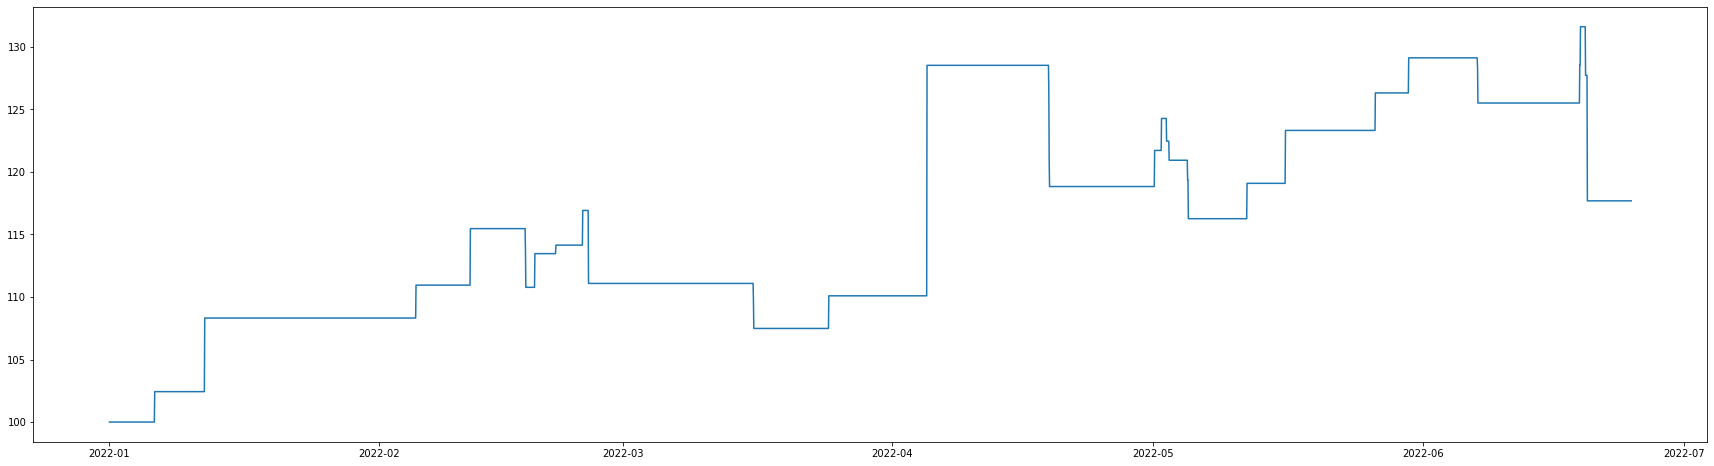

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 15.85%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 50.0%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 37.5%
BTC-PERP win rate: 20.0%
SOL-PERP win rate: 75.0%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count       34.000000
mean         1.151811
std          8.263920
min        -16.011523
25%         -3.521388
50%         -0.024987
75%          4.866907
max         34.275457


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count        8.000000
mean         0.009400
std          6.386977
min         -6.200104
25%         -3.995059
50%         -3.207922
75%          4.866907
max         11.781212


Distribution BTC-PERP:
       profit_percent
count       10.000000
mean        -1.388084
std          4.426485
min         -4.854515
25%         -4.061290
50%         -2.951809
75%         -1.600694
max          8.340764


Distribution SOL-PERP:
       profit_percent
count       16.000000
mean         3.310451
std         10.463406
min        -16.011523
25%          0.292731
50%          4.860005
75%          4.866907
max         34.275457




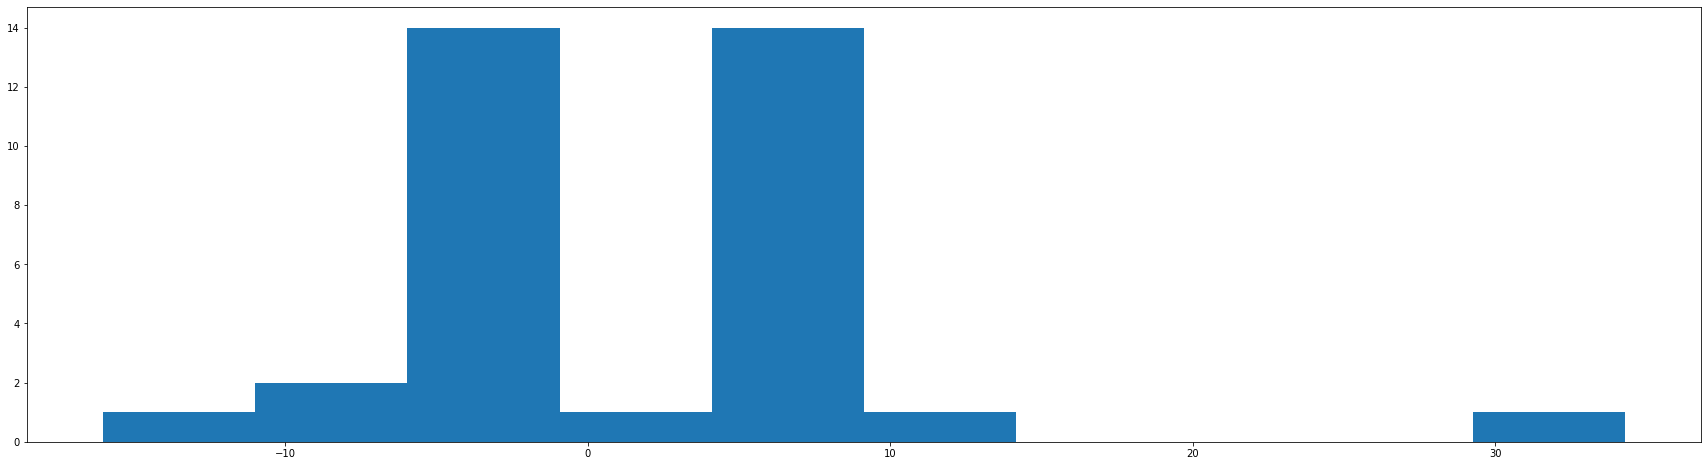

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)